<a href="https://colab.research.google.com/github/ahamedistiaque/Telecom_Customer_Churn_analysis/blob/main/Telecom_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score,accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import plot_confusion_matrix


pd.options.display.max_columns =25

# to remove unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

sns.set_context("talk")
sns.set_style("darkgrid")

In [5]:
path='/content/drive/MyDrive/Colab Notebooks/Data Processing for Machine Learning With Python/Churn.csv'

In [6]:
df=pd.read_csv(path)
display(df.sample(5))

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
61,116,34,268.6,178.2,166.3,11.6,2,no,no,yes,83,45.66,142,15.15,106,7.48,3,3.13,CA,415,405-3371
2039,121,21,126.3,209.6,192.5,10.6,1,no,no,yes,84,21.47,102,17.82,129,8.66,2,2.86,MS,415,344-2260
81,116,0,215.4,204.8,278.5,12.6,3,no,yes,no,104,36.62,79,17.41,109,12.53,5,3.40,OR,415,331-7425
3329,68,0,231.1,153.4,191.3,9.6,3,no,no,no,57,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
1228,124,37,161.2,204.2,231.5,8.9,1,no,no,yes,109,27.40,79,17.36,87,10.42,4,2.40,KS,510,417-7736


In [7]:
print("Number of rows",df.shape[0])
print("Number of columns",df.shape[1])

Number of rows 3333
Number of columns 21


In [8]:
# check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [9]:
# Data statistics
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


In [10]:
df.columns

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Churn', 'Intl_Plan', 'Vmail_Plan',
       'Day_Calls', 'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls',
       'Night_Charge', 'Intl_Calls', 'Intl_Charge', 'State', 'Area_Code',
       'Phone'],
      dtype='object')

In [11]:
# Missing values in the dataset
df.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

In [12]:
df.Churn.value_counts()

no     2850
yes     483
Name: Churn, dtype: int64

In [13]:
df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))


In [14]:
df.sample(5)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
542,152,20,237.5,253.4,265.2,14.2,9,1,1,1,120,40.38,94,21.54,80,11.93,3,3.83,MN,415,416-2778
2510,118,0,189.3,233.5,270.9,10.0,2,0,0,0,119,32.18,112,19.85,104,12.19,1,2.70,VA,408,421-9034
1324,118,0,154.6,184.2,217.4,12.6,2,0,0,0,112,26.28,105,15.66,102,9.78,5,3.40,VA,415,392-3315
1287,149,0,196.3,136.8,154.7,7.7,2,0,0,0,108,33.37,96,11.63,87,6.96,3,2.08,OH,408,340-5930
587,114,0,169.6,58.9,179.3,7.4,1,0,0,0,85,28.83,86,5.01,124,8.07,8,2.00,NH,415,406-4588


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [16]:
df.corr()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.016541,0.024735,0.002918,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546,-0.012463
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.089728,0.008745,0.956927,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884,-0.001994
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.205151,0.049396,-0.001684,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092,-0.008264
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,0.092796,0.019100,0.021545,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067,0.003580
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.035493,-0.028905,0.006079,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180,-0.005825
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.068239,0.045871,-0.001318,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993,-0.018288
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,0.208750,-0.024522,-0.017824,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675,0.027572
Churn,0.016541,-0.089728,0.205151,0.092796,0.035493,0.068239,0.208750,1.000000,0.259852,-0.102148,0.018459,0.205151,0.009233,0.092786,0.006141,0.035496,-0.052844,0.068259,0.006174
Intl_Plan,0.024735,0.008745,0.049396,0.019100,-0.028905,0.045871,-0.024522,0.259852,1.000000,0.006006,0.003755,0.049398,0.006114,0.019106,0.012451,-0.028913,0.017366,0.045780,0.048551
Vmail_Plan,0.002918,0.956927,-0.001684,0.021545,0.006079,-0.001318,-0.017824,-0.102148,0.006006,1.000000,-0.011086,-0.001686,-0.006444,0.021559,0.015553,0.006064,0.007618,-0.001276,-0.000747


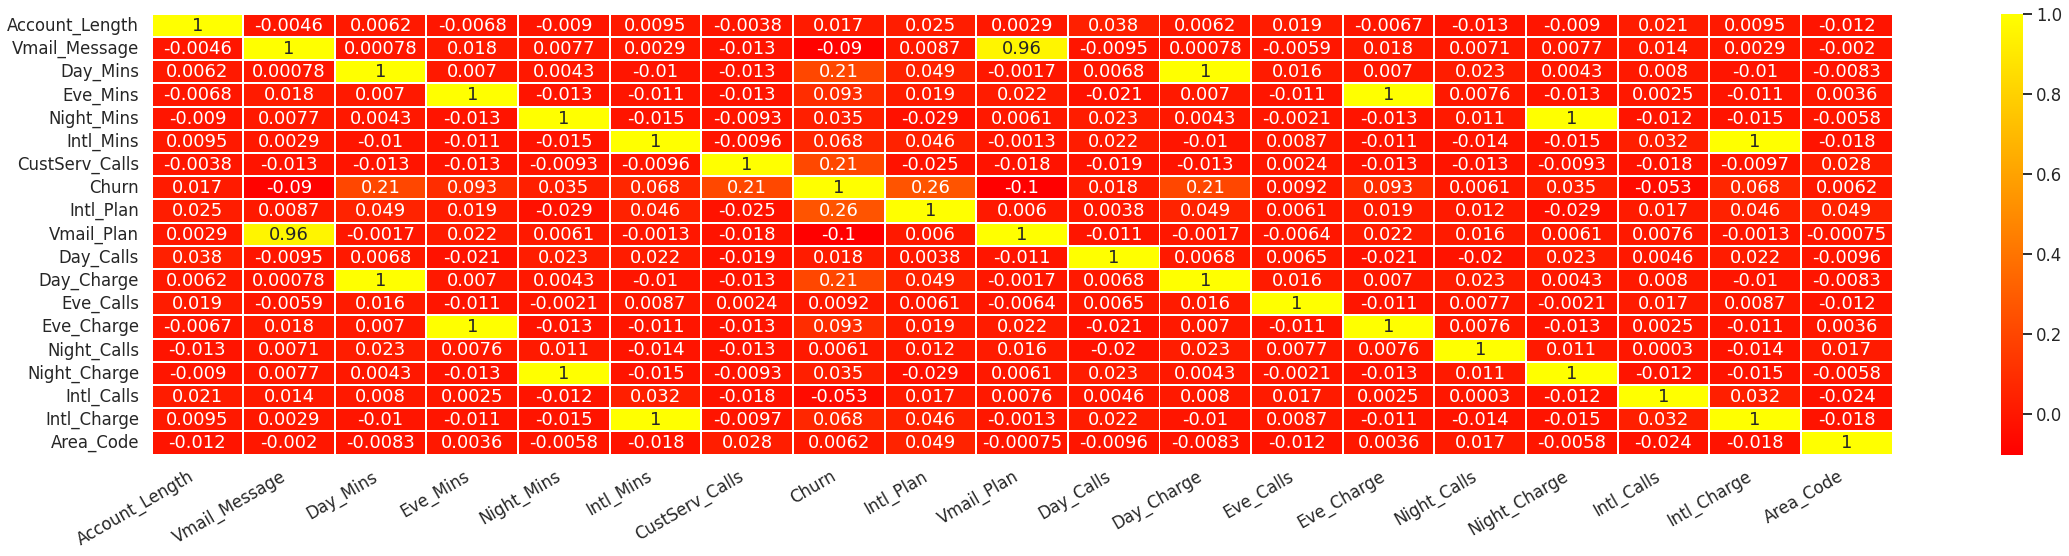

In [17]:
plt.figure(figsize=(39,9))
sns.heatmap(df.corr(),annot=True,cmap='autumn',linewidths=1,fmt='0.2g')
plt.xticks(rotation='horizontal')
plt.gcf().autofmt_xdate()

In [18]:
df=df.drop(['Area_Code','Phone','State'],axis=1)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

#**Encoding**

### **Data train for ML**

In [20]:
df['Churn'].value_counts()


0    2850
1     483
Name: Churn, dtype: int64

In [21]:
X = df.drop(['Churn'],axis=1)
y =df[['Churn']]


print("Shape of X = ", X.shape)
print("Shape of y = ", y.shape)

Shape of X =  (3333, 17)
Shape of y =  (3333, 1)


### Split train and test set


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, 
                                                    random_state=40, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666, 1) (667, 1)


**Find the ratio of yes/no**

In [23]:
y_train["Churn"].value_counts(normalize=True)*100

0    85.52138
1    14.47862
Name: Churn, dtype: float64

In [24]:
y_test["Churn"].value_counts(normalize=True)*100

0    85.457271
1    14.542729
Name: Churn, dtype: float64

### **Applied Linear Regression Model**

In [25]:
model = LogisticRegression()
model = model.fit(X_train, y_train)

In [26]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 

In [27]:
y_test

,Churn
3045,1
2001,1
3315,0
2433,0
1901,0
...,...
2896,0
2812,0
823,0
633,0


In [28]:
model.predict_proba(X_test)[:,1]

array([0.47628366, 0.05013559, 0.02355578, 0.19552887, 0.06171503,
       0.42693945, 0.03430356, 0.07766942, 0.04816898, 0.06855522,
       0.91995651, 0.0658986 , 0.05338495, 0.02290663, 0.29799351,
       0.01345614, 0.00875693, 0.06725806, 0.11159538, 0.00964206,
       0.38587236, 0.03450771, 0.07611104, 0.18027036, 0.02850515,
       0.07190875, 0.19532652, 0.0687932 , 0.11570747, 0.13013233,
       0.13017488, 0.08697028, 0.02963403, 0.10761588, 0.1936777 ,
       0.07912438, 0.01251169, 0.07198183, 0.45528101, 0.07080546,
       0.07487421, 0.11656253, 0.04671178, 0.04390096, 0.1254846 ,
       0.0549938 , 0.08788492, 0.3341089 , 0.56056921, 0.05514725,
       0.02689936, 0.25991623, 0.06510426, 0.34392467, 0.08519075,
       0.01392558, 0.09838068, 0.03891104, 0.06936602, 0.22700618,
       0.10946386, 0.05798893, 0.05377976, 0.27494252, 0.3312431 ,
       0.10304398, 0.01847427, 0.51037098, 0.07937954, 0.07044192,
       0.10637317, 0.21159473, 0.02643722, 0.31355541, 0.32598

In [29]:
y_test["Churn_probability"] = np.round(model.predict_proba(X_test)[:,1],2)
y_test["Predicted_Data"]=y_pred
y_test

,Churn,Churn_probability,Predicted_Data
3045,1,0.48,0
2001,1,0.05,0
3315,0,0.02,0
2433,0,0.20,0
1901,0,0.06,0
...,...,...,...
2896,0,0.29,0
2812,0,0.06,0
823,0,0.09,0
633,0,0.07,0


### 6. Show the Confusion Matrix, Classification report, and ROC-AUC


***Confusion Matrix***

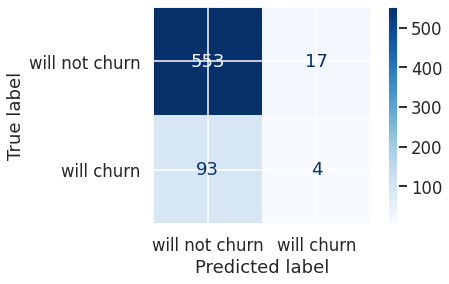

In [30]:
plot_confusion_matrix(model,
                      X_test,
                      y_test["Churn"],
                      display_labels = ["will not churn", "will churn"],
                      cmap = "Blues")

plt.show()

In [31]:
confusion_matrix_ = confusion_matrix(y_test["Churn"],
                                     y_test["Predicted_Data"])
print(confusion_matrix_)

[[553  17]
 [ 93   4]]


In [32]:
# True/False---Positive/Negative
TN = confusion_matrix_[0,0]
print("True Negatives = ", TN)

FN = confusion_matrix_[1,0]
print("False Negatives = ", FN)

FP = confusion_matrix_[0,1]
print("False Positives = ", FP)

TP = confusion_matrix_[1,1]
print("True Positives = ", TP)

True Negatives =  553
False Negatives =  93
False Positives =  17
True Positives =  4


### **Find Prediction Error**


In [33]:
classification_report_ = classification_report(y_test["Churn"],
                                               y_test["Predicted_Data"])
print(classification_report_)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       570
           1       0.19      0.04      0.07        97

    accuracy                           0.84       667
   macro avg       0.52      0.51      0.49       667
weighted avg       0.76      0.84      0.79       667



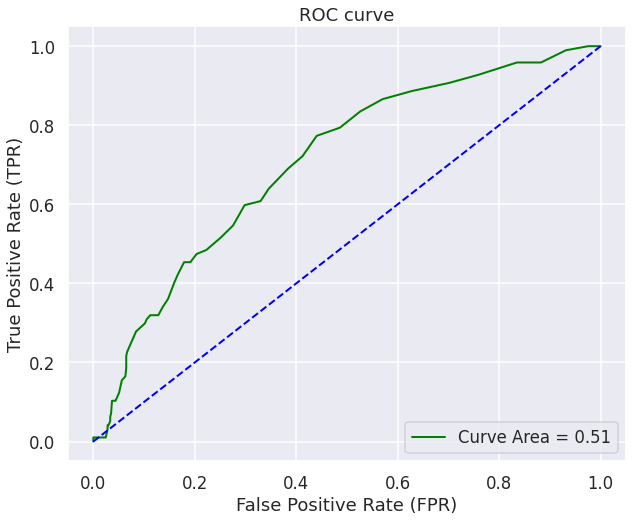

In [34]:
fpr, tpr, thr = roc_curve(y_test['Churn'], 
                          y_test['Churn_probability'])
auc = np.round(roc_auc_score(y_test['Churn'], 
                             y_test['Predicted_Data']), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

### 7. Explain accuracy, precision, recall, f1 score


In [35]:
accuracy = (TN+TP)/(TN+TP+FP+FN)
print(accuracy)

0.8350824587706147


**Precision, Recall/Sensitivity/True Positive Rate, F1 score**






In [36]:
precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_test['Predicted_Data']), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_test['Predicted_Data']), 2)

f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_test['Predicted_Data']), 2)

print("Precision = ", precision_) # Result near 1 is beeter
print("Recall = ", recall_)  # Result near 1 is beeter
print("f1_score = ", f1_score__)  # Result near 1 is beeter

Precision =  0.19
Recall =  0.04
f1_score =  0.07


### **Decision Tree classifier**

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [39]:
model_DT = DecisionTreeClassifier()
model_DT = model_DT.fit(X_train, y_train)

In [43]:
y_pred_DT = model_DT.predict(X_test)


In [46]:
y_test['DT']=y_pred_DT 
y_test


,Churn,Churn_probability,Predicted_Data,DT
3045,1,0.48,0,1
2001,1,0.05,0,1
3315,0,0.02,0,0
2433,0,0.20,0,0
1901,0,0.06,0,0
...,...,...,...,...
2896,0,0.29,0,0
2812,0,0.06,0,0
823,0,0.09,0,0
633,0,0.07,0,0


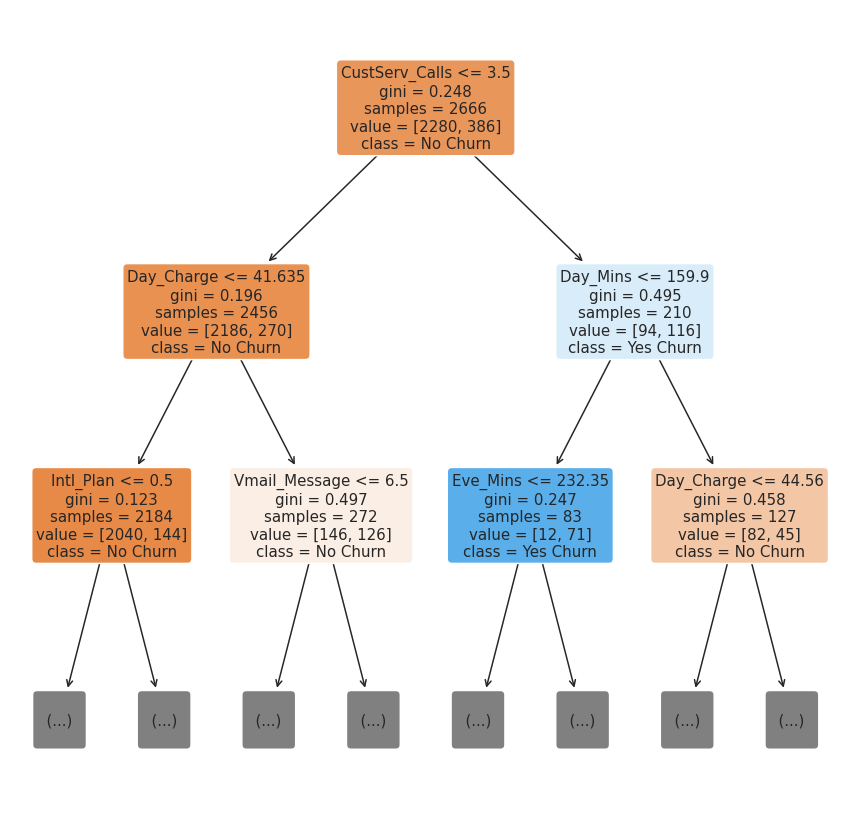

In [42]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, 
           filled=True,
           rounded=True,
           class_names = ["No Churn", "Yes Churn"],
           feature_names = X.columns,
          max_depth=2, 
          fontsize=15)

plt.show()

**Model Performance Evaluation**

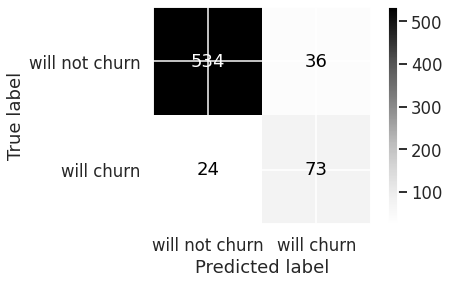

In [49]:
plot_confusion_matrix(model_DT, 
                      X_test, 
                      y_test["Churn"],
                      display_labels = ["will not churn", "will churn"],
                      cmap='Greys')
plt.show()

**Precision, Recall/Sensitivity/True Positive Rate, F1 score for Decision Tree**


In [53]:
precision_ = np.round(precision_score(y_test['Churn'], 
                                      y_pred_DT), 2)
recall_ = np.round(recall_score(y_test['Churn'], 
                                y_pred_DT), 2)

f1_score__ = np.round(f1_score(y_test['Churn'], 
                               y_pred_DT), 2)

print("Precision = ", precision_) # Result near 1 is beeter
print("Recall = ", recall_)  # Result near 1 is beeter
print("f1_score = ", f1_score__)  # Result near 1 is beeter

Precision =  0.67
Recall =  0.75
f1_score =  0.71


Accuracy:  0.9100449775112444
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       570
           1       0.67      0.75      0.71        97

    accuracy                           0.91       667
   macro avg       0.81      0.84      0.83       667
weighted avg       0.92      0.91      0.91       667



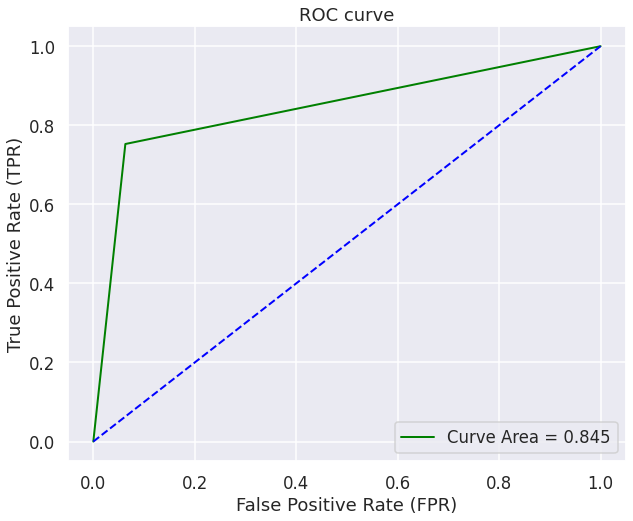

In [52]:
print('Accuracy: ', accuracy_score(y_test['Churn'], y_pred_DT))

print(classification_report(y_test['Churn'], y_pred_DT))

fpr, tpr, thr = roc_curve(y_test['Churn'], model_DT.predict_proba(X_test)[:,1])
auc = roc_auc_score(y_test['Churn'], y_pred_DT)
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='green', lw=2, label="Curve Area = %0.3f" % auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()